In [1]:
# Import required libraries and dependencies
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the data into a Pandas DataFrame and make the index the "coin_id" column.
market_data_df = pd.read_csv("Resources/crypto_market_data.csv", index_col="coin_id")

# Display sample data
market_data_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [3]:
# Generate summary statistics
market_data_df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


### Prepare the Data

In [4]:
#check the data columns type
market_data_df.dtypes

price_change_percentage_24h     float64
price_change_percentage_7d      float64
price_change_percentage_14d     float64
price_change_percentage_30d     float64
price_change_percentage_60d     float64
price_change_percentage_200d    float64
price_change_percentage_1y      float64
dtype: object

In [6]:
# Normalize the selected percentage change columns from the dataset using the `StandardScaler()` module
scaled_data=StandardScaler().fit_transform(market_data_df[['price_change_percentage_24h', 'price_change_percentage_7d','price_change_percentage_14d', 'price_change_percentage_30d',
       'price_change_percentage_60d', 'price_change_percentage_200d','price_change_percentage_1y']])
scaled_data[:3]

array([[ 0.50852937,  0.49319307,  0.77220043,  0.23545963, -0.0674951 ,
        -0.35595348, -0.25163688],
       [ 0.18544589,  0.93444504,  0.55869212, -0.05434093, -0.27348273,
        -0.11575947, -0.19935211],
       [ 0.02177396, -0.70633685, -0.02168042, -0.06103015,  0.00800452,
        -0.55024692, -0.28206051]])

In [7]:
# Create a DataFrame with the scaled data
scaled_df=pd.DataFrame(scaled_data,columns=['price_change_percentage_24h', 'price_change_percentage_7d',
       'price_change_percentage_14d', 'price_change_percentage_30d',
       'price_change_percentage_60d', 'price_change_percentage_200d',
       'price_change_percentage_1y'])

# Copy the crypto names from the original data
scaled_df['coin_id']=market_data_df.index


# Set the coinid column as index
scaled_df=scaled_df.set_index('coin_id')


# Display sample data
scaled_df.head()


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


### Find the Best Value for k Using the Original Scaled DataFrame.

In [8]:
# Create a list of k-values to try (from 1 to 10)
k = list(range(1, 11))

# Initialize an empty list to store inertia values for each k
inertia = []

# Loop through each k-value to compute the inertia for that number of clusters
for i in k:
    # 1. Initialize a KMeans model with the current k-value as the number of clusters
    model = KMeans(n_clusters=i, n_init='auto', random_state=0)
    # 2. Fit the model to the scaled data (scaled_df)
    model.fit(scaled_df)
    # 3. Append the inertia value (sum of squared distances of samples to their cluster center) to the inertia list
    inertia.append(model.inertia_)

# Create a dictionary to store k-values and their corresponding inertia values for plotting
elbow_data = {'k': k, 'inertia': inertia}

# Convert the dictionary into a DataFrame for easy viewing and analysis
elbow_df = pd.DataFrame(elbow_data)

# Display the DataFrame containing k-values and their inertia values
elbow_df


,k,inertia
0,1,287.000000
1,2,198.571818
2,3,145.635748
3,4,79.022435
4,5,66.217780
5,6,59.139070
6,7,48.406314
7,8,38.993588
8,9,34.400595
9,10,28.573603


<Axes: title={'center': 'Elbow Curve'}, xlabel='k'>

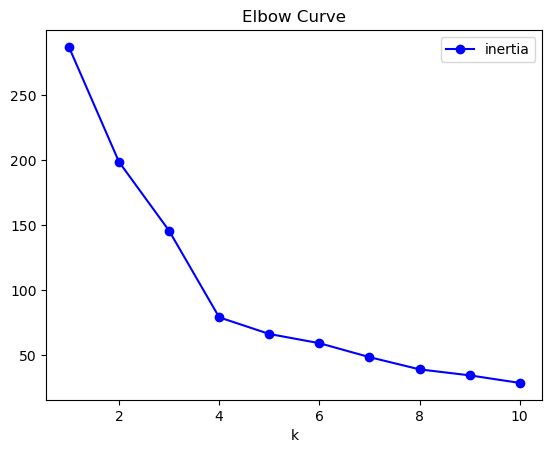

In [9]:
# Plot a line chart with all the inertia values computed for different k-values
# The elbow curve helps to visually identify the optimal k-value by looking for the 'elbow' point
elbow_df.plot.line(x="k", y="inertia", title="Elbow Curve", marker='o', linestyle='-', color='b')


#### Answer the following question: 
**Question:** What is the best value for `k`?

**Answer:** Based on the elbow method plot, the optimal value for `𝑘`is 4, as the inertia values start to decrease at a slower rate beyond this point, indicating diminishing returns in clustering quality with higher `𝑘`

### Cluster Cryptocurrencies with K-means Using the Original Scaled Data.

In [10]:
# Initialize the K-Means model using the optimal value for k (in this case, k=4)
# The model is initialized with 4 clusters as determined by the elbow curve
model_k = KMeans(n_clusters=4, n_init='auto', random_state=1)

In [11]:
# Fit the K-Means model to the scaled data (scaled_df)
# This step applies the K-Means clustering algorithm to the scaled data to find 4 clusters
model_k.fit(scaled_df)


KMeans(n_clusters=4, random_state=1)

In [12]:
# Predict the clusters for each cryptocurrency based on the scaled data
# This step assigns each cryptocurrency to one of the 4 clusters identified by the K-Means model
scaled_segment_3 = model_k.predict(scaled_df)

# View the resulting array of cluster labels assigned to each cryptocurrency
scaled_segment_3


array([2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 3, 2, 0, 0, 1, 0, 0, 0, 0])

In [13]:
# Create a copy of the scaled DataFrame to avoid modifying the original data
# This copy will be used to add the cluster labels without altering the original 'scaled_df'
crypto_scaled = scaled_df.copy()


In [14]:
# Add a new column to the DataFrame 'crypto_scaled' to store the predicted cluster labels
# The 'crypto_cluster' column will indicate which cluster each cryptocurrency belongs to
crypto_scaled['crypto_cluster'] = scaled_segment_3

# Display the first few rows of the updated DataFrame with the cluster labels
crypto_scaled.head()


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,crypto_cluster
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,2
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,2
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,2


<Axes: xlabel='price_change_percentage_24h', ylabel='price_change_percentage_7d'>

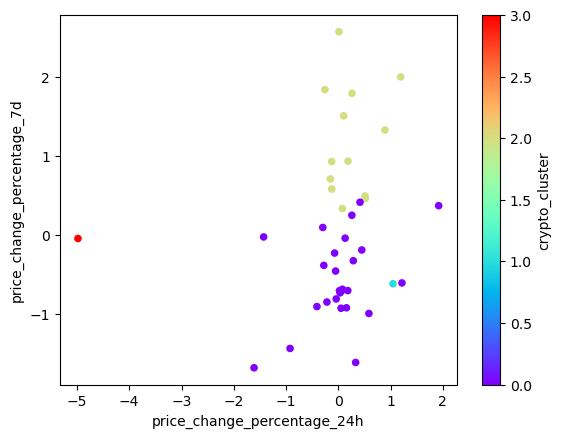

In [15]:
# Create a scatter plot to visualize the relationship between the price changes over 24 hours and 7 days
# The x-axis represents 'price_change_percentage_24h' and the y-axis represents 'price_change_percentage_7d'
# The color of the points is determined by the predicted cluster labels ('crypto_cluster') using the 'rainbow' colormap
crypto_scaled.plot.scatter(x='price_change_percentage_24h', y='price_change_percentage_7d', c='crypto_cluster', colormap='rainbow')


### Optimize Clusters with Principal Component Analysis.

In [16]:
# Create an instance of the PCA (Principal Component Analysis) model
# Set the number of components to 3 to reduce the data to 3 principal components
pca = PCA(n_components=3)


In [17]:
# Apply PCA (Principal Component Analysis) on the scaled data to reduce it to three principal components
# The fit_transform method will fit the PCA model and then transform the scaled data into the reduced dimensionality
crypto_pca_data = pca.fit_transform(scaled_df)

# Display the first five rows of the transformed data, which are now reduced to 3 principal components
crypto_pca_data[:5]


array([[-0.60066733,  0.84276006,  0.46159457],
       [-0.45826071,  0.45846566,  0.95287678],
       [-0.43306981, -0.16812638, -0.64175193],
       [-0.47183495, -0.22266008, -0.47905316],
       [-1.15779997,  2.04120919,  1.85971527]])

In [18]:
# Retrieve the explained variance ratio for each principal component
# This tells us how much of the total variance in the data is explained by each of the 3 principal components
pca.explained_variance_ratio_


array([0.3719856 , 0.34700813, 0.17603793])

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** The total explained variance (0.895) indicates that the first three principal components explain about 89.5% of the total variance in the data. This suggests that these components capture most of the important information from the original dataset

In [32]:
# Create a new DataFrame with the PCA data and label the columns as PCA1, PCA2, and PCA3
crypto_pca_df = pd.DataFrame(crypto_pca_data, columns=['PC1', 'PC2', 'PC3'])

# Add the coin names (coin_id) from the original data to the PCA DataFrame
crypto_pca_df['coin_id'] = market_data_df.index

# Set the 'coin_id' column as the index for better referencing
crypto_pca_df = crypto_pca_df.set_index('coin_id')

# Display the first few rows of the new DataFrame with PCA data
crypto_pca_df.head()


,PC1,PC2,PC3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


### Find the Best Value for k Using the PCA Data

In [21]:
# Create a list with the number of k-values to try (range from 1 to 11)
k = list(range(1, 11))

# Create an empty list to store the inertia values for each k
inertia = []

# Loop through each value of k to compute the inertia
for i in k:
    # 1. Create a KMeans model for the current value of k (n_clusters)
    model = KMeans(n_clusters=i, n_init='auto', random_state=1)
    
    # 2. Fit the KMeans model on the PCA-transformed data
    model.fit(crypto_pca_df)
    
    # 3. Append the inertia value of the model to the inertia list
    inertia.append(model.inertia_)

# Create a dictionary with the k-values and corresponding inertia values to plot the Elbow curve
elbow_data = {"k": k, "inertia": inertia}

# Create a DataFrame to organize the data for plotting the Elbow curve
elbow_df = pd.DataFrame(elbow_data)

# Display the DataFrame to inspect the k-values and corresponding inertia
elbow_df


,k,inertia
0,1,256.874086
1,2,182.339530
2,3,135.442408
3,4,49.665497
4,5,38.672582
5,6,34.507577
6,7,23.728365
7,8,18.574523
8,9,15.572672
9,10,11.407667


<Axes: title={'center': 'Elbow Curve'}, xlabel='k'>

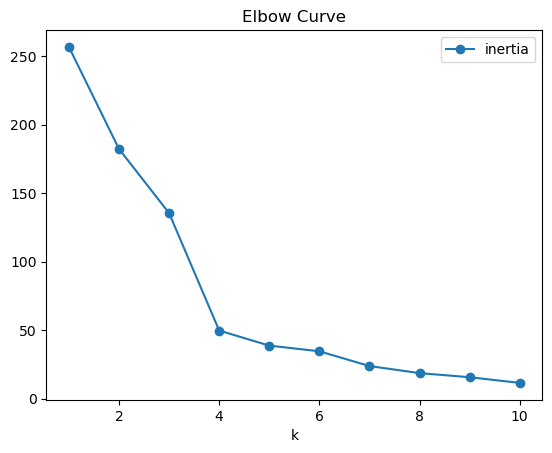

In [22]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
elbow_df.plot.line(x='k', y='inertia', title='Elbow Curve',marker='o')


#### Answer the following questions: 
* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** Based on the Elbow curve, the best value for k when using the PCA data is k = 4. This is where the inertia starts to level off, indicating the optimal number of clusters.


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** No, the best k value found using the PCA data is the same as the one found using the original data, which is k = 4. The Elbow curve analysis for both datasets suggests that 4 clusters is the optimal choice.

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [23]:
# Initialize the K-Means model using the optimal value for k (k=4)
model_k = KMeans(n_clusters=4, n_init='auto', random_state=1)


In [24]:
# Fit the K-Means model using the PCA-transformed data
model_k.fit(crypto_pca_df)


KMeans(n_clusters=4, random_state=1)

In [ ]:
# Predict the clusters to group the cryptocurrencies using the PCA data
crypto_pca_prediction = model_k.predict(crypto_pca_df)

# Print the resulting array of cluster values
crypto_pca_prediction

array([2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 3, 2, 0, 0, 1, 0, 0, 0, 0])

In [33]:
# Create a copy of the DataFrame with the PCA data
crypto_pca_df_prediction = crypto_pca_df.copy()

# Add a new column to the DataFrame with the predicted clusters
crypto_pca_df_prediction['crypto_cluster'] = crypto_pca_prediction  

# Display sample data
crypto_pca_df_prediction.head()


,PC1,PC2,PC3,crypto_cluster
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,2
ethereum,-0.458261,0.458466,0.952877,2
tether,-0.433070,-0.168126,-0.641752,0
ripple,-0.471835,-0.222660,-0.479053,0
bitcoin-cash,-1.157800,2.041209,1.859715,2


<Axes: title={'center': 'PCA Scatter Plot'}, xlabel='PC1', ylabel='PC2'>

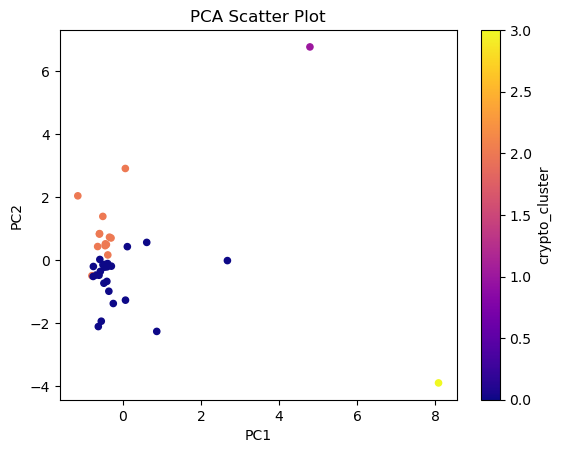

In [34]:
#Create a scatter plot using hvPlot by setting `x="PCA1"` and `y="PCA2"`.
crypto_pca_df_prediction.plot.scatter(x='PC1', y='PC2', c='crypto_cluster', colormap='plasma', title="PCA Scatter Plot")

**Question:**  What is the impact of using fewer features to cluster the data using K-Means?

**Answer**:In the cryptocurrency clustering project:
- Using all features: K-Means may include irrelevant or noisy features, which can dilute the importance of meaningful attributes and potentially reduce clustering accuracy. The algorithm might struggle to differentiate clusters due to the increased noise and dimensionality.
- Using fewer features with PCA: By reducing the number of features through Principal Component Analysis (PCA), the algorithm leverages components that capture the most significant variance in the data. This not only improves computational efficiency but also enhances cluster quality by focusing on the most relevant patterns while avoiding the effects of irrelevant or redundant features.
> This trade-off emphasizes the importance of effective dimensionality reduction for optimal clustering performance.


### Determine the Weights of Each Feature on each Principal Component

In [35]:
# Create a DataFrame to store the PCA component weights
pca_component_weights = pd.DataFrame(
    pca.components_.T,  # Transpose to match the dimensions correctly
    columns=['PC1', 'PC2', 'PC3'],  # Each principal component as a column
    index=scaled_df.columns  # Original feature names as the index
)

# Display the component weights
pca_component_weights


,PC1,PC2,PC3
price_change_percentage_24h,-0.416728,0.358162,-0.218795
price_change_percentage_7d,-0.102432,0.227432,0.787670
price_change_percentage_14d,-0.009162,0.540415,0.349534
price_change_percentage_30d,0.191523,0.562182,-0.181744
price_change_percentage_60d,0.320365,0.434040,-0.361377
price_change_percentage_200d,0.594468,0.027735,0.039733
price_change_percentage_1y,0.568379,-0.150789,0.210541


In [29]:
print("Shape of pca.components_:", pca.components_.shape)  # Should be (n_components, n_features)
print("Shape of pca.components_.T:", pca.components_.T.shape)  # Should be (n_features, n_components)
print("Length of scaled_df.columns:", len(scaled_df.columns))  # Should match n_features


Shape of pca.components_: (3, 7)
Shape of pca.components_.T: (7, 3)
Length of scaled_df.columns: 7


#### Answer the following question: 

* **Question:** Which features have the strongest positive or negative influence on each component? 
 
* **Answer:** 
- PCA1:
    - Strongest Negative Influence: price_change_percentage_24h has the strongest negative weight of -0.416728, indicating it has the most negative influence on PCA1.
    - Strongest Positive Influence: price_change_percentage_200d has the strongest positive weight of 0.594468, indicating it has the most positive influence on PCA1.
- PCA2:
    - Strongest Positive Influence: price_change_percentage_30d has the strongest positive weight of 0.562182, indicating it has the most positive influence on PCA2.
    - Strongest Negative Influence: price_change_percentage_1y has the strongest negative weight of -0.150789, indicating it has the most negative influence on PCA2.
- PCA3:
    - Strongest Positive Influence: price_change_percentage_7d has the strongest positive weight of 0.787670, indicating it has the most positive influence on PCA3.
    - Strongest Negative Influence: price_change_percentage_60d has the strongest negative weight of -0.361377, indicating it has the most negative influence on PCA3.

#### Summary of Influences:

- **PCA1:**
    - Strongest negative influence: price_change_percentage_24h
    - Strongest positive influence: price_change_percentage_200d

- **PCA2:**
    - Strongest positive influence: price_change_percentage_30d
    - Strongest negative influence: price_change_percentage_1y

- **PCA3:**
    - Strongest positive influence: price_change_percentage_7d
    - Strongest negative influence: price_change_percentage_60d

> These weights indicate the relative importance and influence of each feature on the components, with larger absolute values representing stronger influences.